In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [82]:
#llamar los daros de contaminantes del 2015

ruta="https://raw.githubusercontent.com/marinlopabi/Temas-Selectos-PQ-AD-Python/refs/heads/main/Datos/rama_2015.csv"

df_15=pd.read_csv(ruta)
df_15.head()

,fecha,CO,NO,NO2,NOX,O3,PM10,PM25,SO2
0,2015-01-01,1.050696,22.765528,24.225155,46.987578,23.175150,105.573684,78.953405,11.554723
1,2015-01-02,0.807585,32.249608,21.554160,53.800628,17.268366,36.687845,15.449438,1.895052
2,2015-01-03,0.640755,21.686916,19.394081,41.071651,15.486486,29.269022,12.915129,1.436937
3,2015-01-04,0.726940,24.606272,19.560976,44.165505,17.329032,39.961538,16.838284,1.809061
4,2015-01-05,0.530815,11.443182,20.990260,32.439935,14.470588,31.855643,12.667774,8.315789


Para realizar el test de Mann-Kendall

In [83]:
!pip install pymannkendall #instala el paquete

In [84]:
import pymannkendall as mk #importa la librería que permite aplicar el test para evaluar tendencias temporales

In [85]:
resultado = mk.original_test(df_15['PM10'], alpha = 0.05) # Aplica el test de Mann-Kendall a la columna 'PM10' de df_15.
resultado

Mann_Kendall_Test(trend='decreasing', h=np.True_, p=np.float64(0.012908845896614007), z=np.float64(-2.486274203194176), Tau=np.float64(-0.08718952280596116), s=np.float64(-5792.0), var_s=5425116.666666667, slope=np.float64(-0.02072633401418798), intercept=np.float64(45.04943944450191))

La serie analizada presenta una tendencia decreciente, significativa. El p valor es de 0.0129. Indica que los valores de PM10 (contaminante examinado) disminuyen 0.0207 unidades por cada unidad de tiempo.

In [86]:
for val in resultado: print(val) #Toma cada valor obtenido y lo imprime en líneas separadas

decreasing
True
0.012908845896614007
-2.486274203194176
-0.08718952280596116
-5792.0
5425116.666666667
-0.02072633401418798
45.04943944450191


In [87]:
df_15['fecha'] = pd.to_datetime(df_15['fecha']) #para que la columna de fecha la reconozca como datatime y no como float

In [100]:
df_15 = df_15.set_index('fecha') #convertir la columa en indice

In [101]:
df_15.columns #imprime el nombre de las columnas

Index(['CO', 'NO', 'NO2', 'NOX', 'O3', 'PM10', 'PM25', 'SO2'], dtype='object')

In [102]:
# Recorre cada nombre de columna dentro de df_15 (realiza el test para cada contaminante)

for val in df_15.select_dtypes(include=['float64', 'int64']).columns: #para iterar solo en columnas numéricas
    resultado = mk.original_test(df_15[val], alpha = 0.05)
    print(val)
    for val_1 in resultado: print(val_1)
    print('\n')

CO
no trend
False
0.5817462777408493
0.5508357455876581
0.01932861658889056
1284.0
5425116.666666667
6.247824481807817e-05
0.6844165052306556


NO
no trend
False
0.7957212659815356
0.2588885070844566
0.009092277585428271
604.0
5425116.666666667
0.0012858925479734154
16.806508096809377


NO2
no trend
False
0.5793937916242409
0.5542704189818134
0.019449044106578352
1292.0
5425116.666666667
0.0020411195118570746
25.011727927674126


NOX
no trend
False
0.8050110399399659
0.246867150204913
0.008670781273521
576.0
5425116.666666667
0.0020127440321533133
42.052811020930704


O3
decreasing
True
8.206697881463221e-05
-3.9382823805733342
-0.13810025590847508
-9174.0
5425116.666666667
-0.017067828597011815
30.719580098773797


PM10
decreasing
True
0.012908845896614007
-2.486274203194176
-0.08718952280596116
-5792.0
5425116.666666667
-0.02072633401418798
45.04943944450191


PM25
no trend
False
0.24865561519056523
-1.1536209262619153
-0.040463645943097995
-2688.0
5425116.666666667
-0.00546983735323

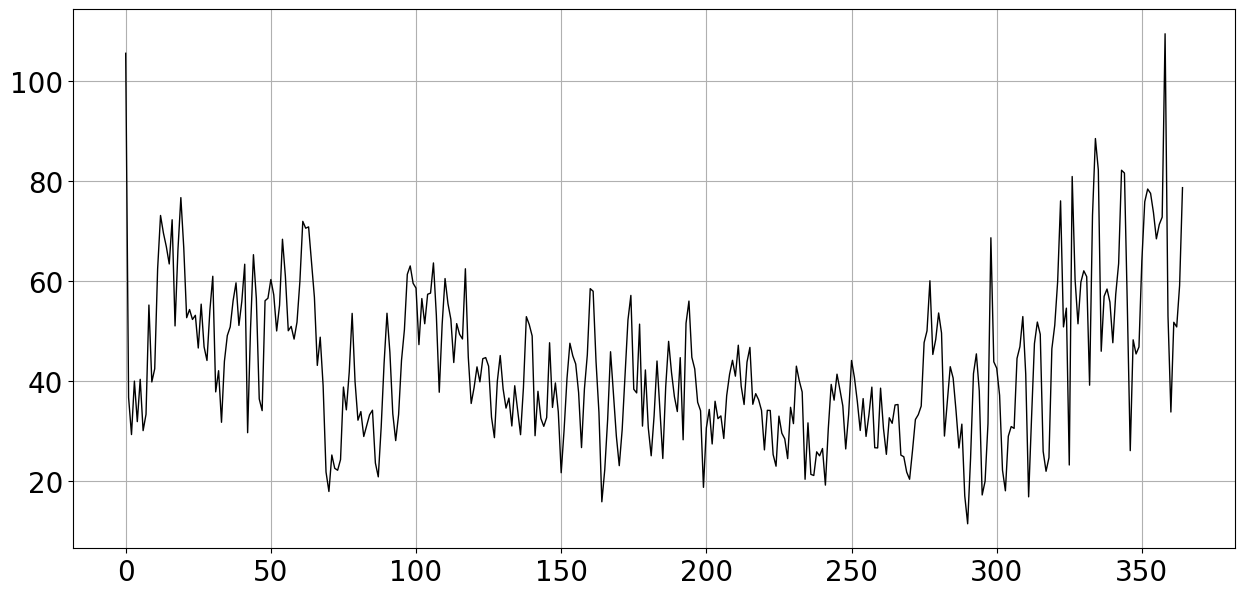

In [90]:
#para obtener una gráfica simple

plt.figure(figsize=(15,7), dpi=100)
plt.plot(df_15['PM10'],lw=1, color='black')
plt.tick_params(labelsize=20)
plt.grid(True)

In [91]:
slope = mk.original_test(df_15['PM10'], alpha = 0.05).slope
intercept = mk.original_test(df_15['PM10'], alpha = 0.05).intercept

La pendiente de Sen se usa para cuantificar la magnitud de la tendencia en una serie temporal. Mientras que el test de Mann–Kendall indica si hay tendencia significativa, la pendiente de Sen indica cuánto cambia la variable por unidad de tiempo

In [92]:
linea = [] #Lista vacía
for i in range(0, len(df_15)):
    linea.append(slope*i+intercept) #para obtener la recta de la pendiente de Sen

In [93]:
linea = pd.DataFrame(linea,index = df_15.index)

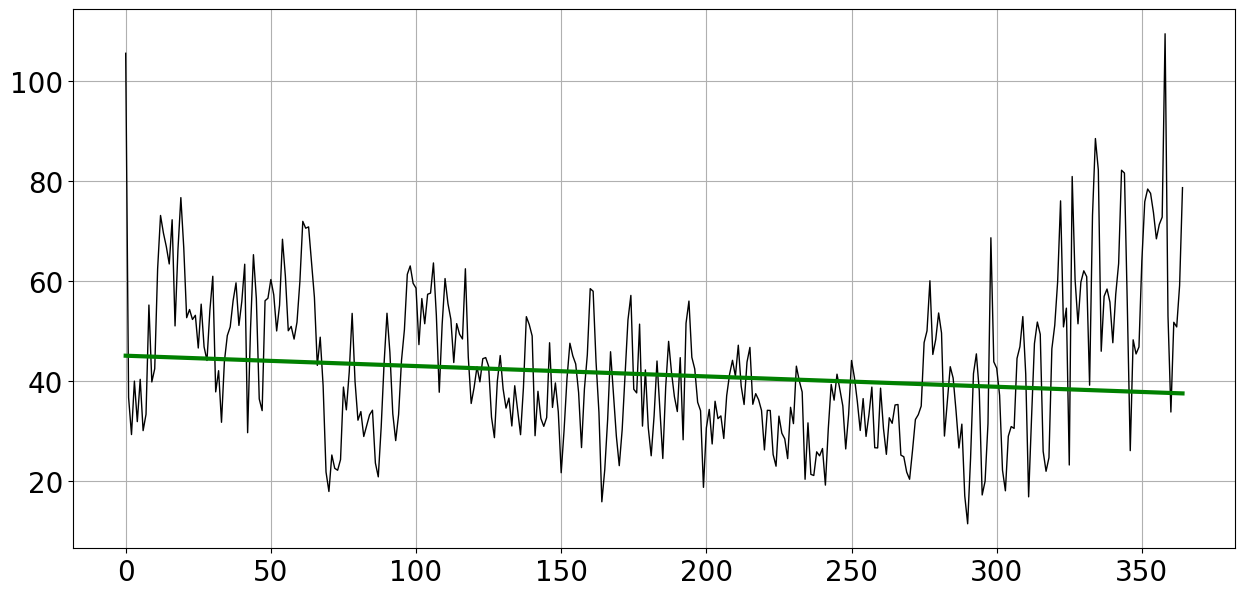

In [94]:
plt.figure(figsize=(15,7), dpi=100)
plt.plot(df_15["PM10"],lw=1, color='black')
plt.plot(linea,lw=3, color='green') # Grafica la línea de tendencia obtenida con la pendiente de Sen
plt.tick_params(labelsize=20)
plt.grid(True)

In [95]:
#leyendo los datos de los demás años

ruta1='https://raw.githubusercontent.com/marinlopabi/Temas-Selectos-PQ-AD-Python/refs/heads/main/Datos/rama_2020.csv'
df_20 = pd.read_csv(ruta1, parse_dates = True, index_col=0)

ruta2='https://raw.githubusercontent.com/marinlopabi/Temas-Selectos-PQ-AD-Python/refs/heads/main/Datos/rama_2021.csv'
df_21 = pd.read_csv(ruta2, parse_dates = True, index_col=0)

ruta3='https://raw.githubusercontent.com/marinlopabi/Temas-Selectos-PQ-AD-Python/refs/heads/main/Datos/rama_2022.csv'
df_22 = pd.read_csv(ruta3, parse_dates = True, index_col=0)

ruta4='https://raw.githubusercontent.com/marinlopabi/Temas-Selectos-PQ-AD-Python/refs/heads/main/Datos/rama_2023.csv'
df_23 = pd.read_csv(ruta4, parse_dates = True, index_col=0)

In [96]:
df = pd.concat([df_20,df_21,df_22,df_23],axis=0) #concatena los datos
df

,CO,NO,NO2,NOX,O3,PM10,PM25,SO2
fecha,,,,,,,,
2020-01-01,0.428817,9.031579,13.382716,22.637895,18.774803,61.312903,26.716475,2.047619
2020-01-02,0.179193,4.286374,8.154297,12.235566,17.941581,26.385827,5.731481,0.942748
2020-01-03,0.306560,13.092157,21.731023,35.358824,24.060172,37.513944,11.231092,1.107143
2020-01-04,0.350833,11.978131,25.974958,38.288270,25.286115,52.280000,29.207951,7.677885
2020-01-05,0.427045,11.007952,29.782972,40.908549,30.433094,39.737609,21.806647,11.798077
...,...,...,...,...,...,...,...,...
2023-05-27,0.256722,3.750583,17.284351,21.629371,41.580645,36.774011,21.170139,2.735683
2023-05-28,0.286826,3.458886,16.349241,20.230769,36.913761,28.580000,18.454861,2.331658
2023-05-29,0.482077,11.448113,24.521154,36.436321,29.697068,30.241486,16.692857,1.071588


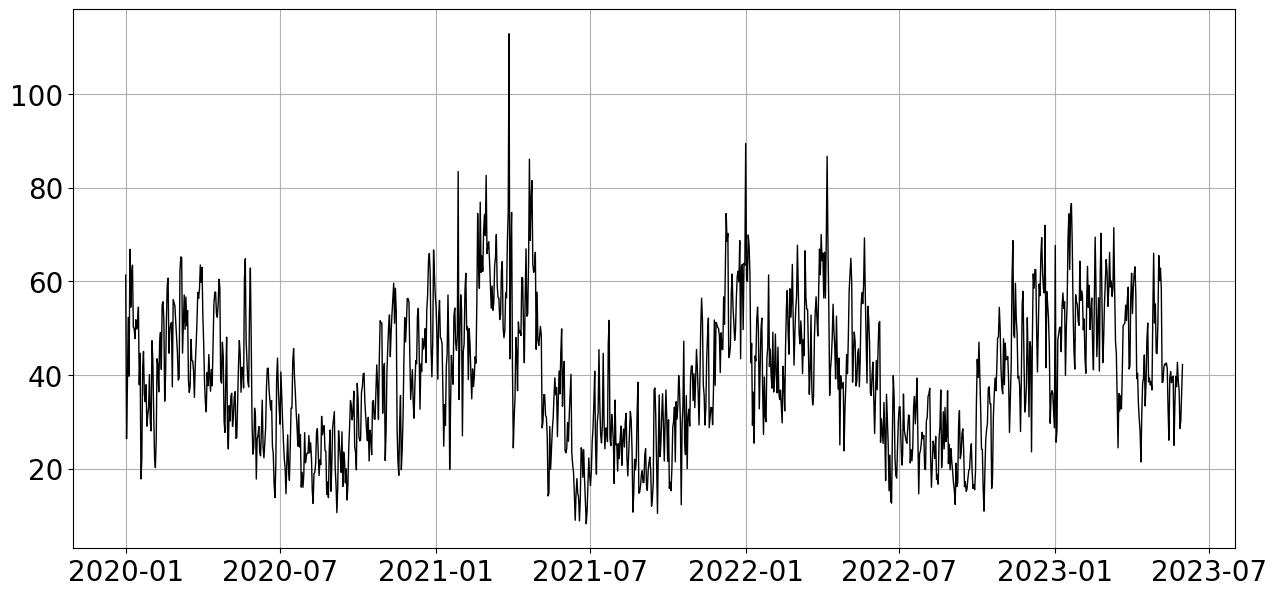

In [97]:
#graficando los datos para el PM10 de todos los años

plt.figure(figsize=(15,7), dpi=100)
plt.plot(df["PM10"],lw=1, color='black')
plt.tick_params(labelsize=20)
plt.grid(True)

In [98]:
#Datos del test de Mann Kendall para todos los contaminantes de los años concatenados

for val in df.columns: # Recorre cada nombre de columna que exista en el DataFrame 'df'
    resultado = mk.original_test(df[val], alpha = 0.05)
    print(val)
    for val_1 in resultado: print(val_1) #Imprimir uno por uno
    print('\n') #linea de separación en blanco

CO
increasing
True
0.0
11.162982537389231
0.21104133065424435
163954.0
215713956.66666666
0.00010859993276843735
0.29448769643071804


NO
increasing
True
3.577604879012597e-11
6.620593056880137
0.12516588769708617
97239.0
215713957.66666666
0.0033155730400020373
8.698442939898955


NO2
increasing
True
2.220446049250313e-16
8.219399797729825
0.15539188112465102
120721.0
215713955.66666666
0.003746181807094772
17.878128734179956


NOX
increasing
True
4.596323321948148e-14
7.542960607031686
0.14260356476731958
110786.0
215713956.66666666
0.007245417198841384
27.21820670174999


O3
no trend
False
0.4805763230288058
0.705375923705529
0.013336662886593957
10361.0
215713957.66666666
0.0005014150362987589
30.298729543496982


PM10
increasing
True
0.0007086436949528263
3.386212952661272
0.0640188136921871
49735.0
215713957.66666666
0.004152539098397998
36.330878589459246


PM25
increasing
True
0.01200550173515924
2.511982572377768
0.047491185908781396
36895.0
215713955.66666666
0.00142473873296

In [104]:
df_15['PM10'] #solo imprime la columna correspondiente al PM10
              #recordar convertir la columna de fechas en índice o el python crea un indice que comienza en 0

,PM10
fecha,
2015-01-01,105.573684
2015-01-02,36.687845
2015-01-03,29.269022
2015-01-04,39.961538
2015-01-05,31.855643
...,...
2015-12-27,33.779817
2015-12-28,51.736973
2015-12-29,50.809013


In [105]:
int(len(df_15)/2) # mitad del número total de filas de df_15

182

In [106]:
p1 = df_15["PM10"].iloc[0:int(len(df_15)/2)] #con iloc se selecciona la fila que se desea (en este caso la que corresponde a la mitad)

In [107]:
p2 = df_15["PM10"].iloc[int(len(df_15)/2):2*int(len(df_15)/2)] #se selecciona la que corresponde a la segunda mitad

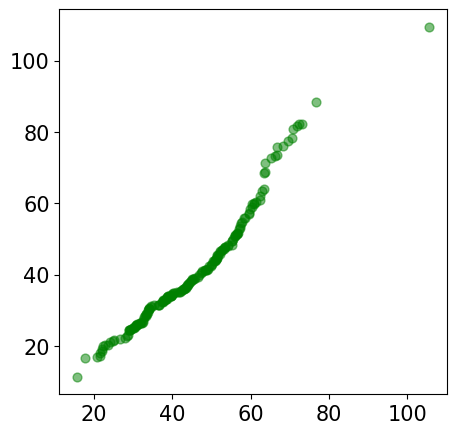

In [116]:
#para obtener el gráfico de dispersión. Si la primera y la segunda mitad se parecen en su distribución los puntos están cerca de una diagonal.
#si hay tendencias los puntos se alejarán de la diagonal.
#Sirve para ver si ha habido cambios en la distribución del contaminante entre los dos periodos.

fig = plt.figure(figsize=(5,5), dpi=100)
plt.scatter(sorted(p1),sorted(p2), s=40, color='green',alpha=0.5)
plt.tick_params(labelsize=15)

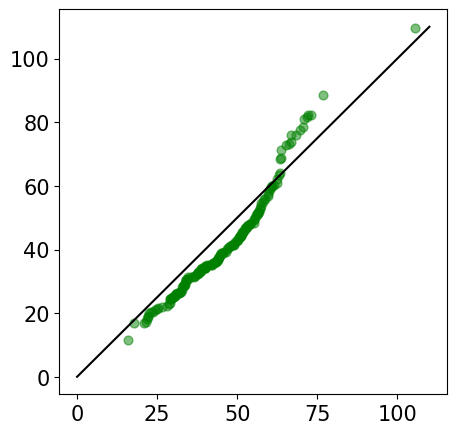

In [115]:
#trazando la línea diagonal

fig = plt.figure(figsize=(5,5), dpi=100)
plt.scatter(sorted(p1),sorted(p2), s=40, color='green', alpha=0.5);
plt.tick_params(labelsize=15)

x_min = 0
x_max = 110
x_vals = np.linspace(x_min, x_max, 100)

plt.plot(x_vals, x_vals, color='black')
plt.show()

* Se observa que los datos se parecen en su distribución por lo que no hay cambios fuertes dde PM10 en los dos períodos.
* Se observa una ligera tendencia al aumento del PM10 dado que los valores de la segunda mitad están un poco por encima que los de la primera.

